# 모듈 설정

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from PIL import Image
import glob
import cv2

# 데이터 설정

In [2]:
name_type = pd.read_csv("pokemon.csv")
name_type

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [3]:
img_paths = glob.glob("images/*")
img_paths[:5]

['images\\abomasnow.png',
 'images\\abra.png',
 'images\\absol.png',
 'images\\accelgor.png',
 'images\\aegislash-blade.png']

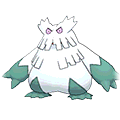

In [4]:
Image.open(img_paths[0])

# 전처리 y 생성

In [5]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
name_type["Type1"]

0         Grass
1         Grass
2         Grass
3          Fire
4          Fire
         ...   
804        Rock
805        Fire
806    Electric
807       Steel
808       Steel
Name: Type1, Length: 809, dtype: object

In [6]:
name_type["Type1"].nunique()

18

In [7]:
enc_y = encoder.fit_transform(name_type["Type1"])
enc_y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [8]:
enc_y.shape

(809, 18)

In [9]:
enc_y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
np.argmax(enc_y[0])

9

In [11]:
encoder.classes_[np.argmax(enc_y[0])]

'Grass'

In [12]:
y = []

for i in enc_y:
    max_idx = np.argmax(i)
    # print(max_idx)
    y.append(max_idx)

In [13]:
y = np.array(y)
y

array([ 9,  9,  9,  6,  6,  6, 17, 17, 17,  0,  0,  0,  0,  0,  0, 12, 12,
       12, 12, 12, 12, 12, 13, 13,  3,  3, 10, 10, 13, 13, 13, 13, 13, 13,
        4,  4,  6,  6, 12, 12, 13, 13,  9,  9,  9,  0,  0,  0,  0, 10, 10,
       12, 12, 17, 17,  5,  5,  6,  6, 17, 17, 17, 14, 14, 14,  5,  5,  5,
        9,  9,  9, 17, 17, 15, 15, 15,  6,  6, 17, 17,  3,  3, 12, 12, 12,
       17, 17, 13, 13, 17, 17,  8,  8,  8, 15, 14, 14, 17, 17,  3,  3,  9,
        9, 10, 10,  5,  5, 12, 13, 13, 10, 10, 12,  9, 12, 17, 17, 17, 17,
       17, 17, 14,  0, 11,  3,  6,  0, 12, 17, 17, 17, 12, 12, 17,  3,  6,
       12, 15, 15, 15, 15, 15, 12, 11,  3,  6,  2,  2,  2, 14, 14,  9,  9,
        9,  6,  6,  6, 17, 17, 17, 12, 12, 12, 12,  0,  0,  0,  0, 13, 17,
       17,  3,  4, 12,  4,  4, 14, 14,  3,  3,  3,  9, 17, 17, 15, 17,  9,
        9,  9, 12,  9,  9,  0, 17, 17, 14,  1,  1, 17,  8, 14, 14, 12,  0,
        0, 12, 10, 16,  4,  4, 17,  0,  0,  0,  1, 12, 12,  6,  6, 11, 11,
       17, 17, 17, 11, 17

In [14]:
encoder.classes_

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype='<U8')

In [15]:
len(encoder.classes_)

18

# X값 전처리

In [16]:
cv2.imread(img_paths[0]).shape

(120, 120, 3)

In [17]:
cv2.imread(img_paths[0])

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [18]:
img_paths[0]
cv2.imread(img_paths[0]).shape

(120, 120, 3)

In [19]:
from tqdm import tqdm

X_array = []

for i in tqdm(img_paths):
    X_array.append(cv2.imread(i))

100%|██████████| 809/809 [00:01<00:00, 467.55it/s]


In [20]:
len(X_array)

809

In [21]:
len(y)

809

In [22]:
X  = np.array(X_array) / 255
np.max(X_array[0]), np.max(X[0])

(255, 1.0)

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((647, 120, 120, 3), (647,), (162, 120, 120, 3), (162,))

In [26]:
model = Sequential()
# 입력층
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='selu', input_shape=(120, 120, 3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='selu', input_shape=(120, 120, 3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Fully-connected layer

# 출력층
model.add(Flatten())
model.add(Dense(units=128, activation="selu"))
model.add(Dense(units=64, activation="selu"))
model.add(Dense(units=32, activation="selu"))
model.add(Dense(len(encoder.classes_), activation="softmax"))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 59, 59, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 16)       

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [31]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=early_stop)

Epoch 1/10
21/21 [==============================] - 2s 74ms/step - loss: 1.9438 - accuracy: 0.4266 - val_loss: 4.1700 - val_accuracy: 0.0370
Epoch 2/10
21/21 [==============================] - 2s 72ms/step - loss: 1.5011 - accuracy: 0.5672 - val_loss: 4.4654 - val_accuracy: 0.0309
Epoch 3/10
21/21 [==============================] - 1s 59ms/step - loss: 1.2085 - accuracy: 0.6816 - val_loss: 4.5782 - val_accuracy: 0.0617


In [32]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,1.943823,0.426584,4.170023,0.037037
1,1.501057,0.567233,4.465416,0.030864
2,1.208517,0.681607,4.578197,0.061728


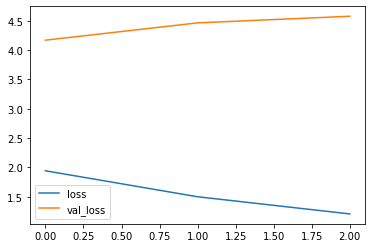

In [34]:
df_hist[["loss", "val_loss"]].plot();

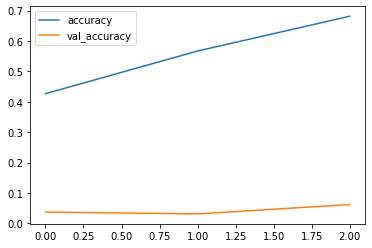

In [35]:
df_hist[["accuracy", "val_accuracy"]].plot();